The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==1.0.0-beta0


# Integral Calculus
:label:`sec_integral_calculus`

Differentiation only makes up half of the content of a traditional calculus education.  The other pillar, integration, starts out seeming a rather disjoint question, "What is the area underneath this curve?"  While seemingly unrelated, integration is tightly intertwined with the differentiation via what is known as the *fundamental theorem of calculus*.

At the level of machine learning we discuss in this book, we will not need a deep understanding of integration. However, we will provide a brief introduction to lay the groundwork for any further applications we will encounter later on.

## Geometric Interpretation
Suppose that we have a function $f(x)$.  For simplicity, let's assume that $f(x)$ is non-negative (never takes a value less than zero).  What we want to try and understand is: what is the area contained between $f(x)$ and the $x$-axis?


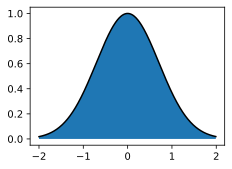

In [1]:
%matplotlib inline
import torch
from IPython import display
from mpl_toolkits import mplot3d
from d2l import torch as d2l

x = torch.arange(-2, 2, 0.01)
f = torch.exp(-x**2)

d2l.set_figsize()
d2l.plt.plot(x, f, color='black')
d2l.plt.fill_between(x.tolist(), f.tolist())
d2l.plt.show()

In most cases, this area will be infinite or undefined (consider the area under $f(x) = x^{2}$), so people will often talk about the area between a pair of ends, say $a$ and $b$.


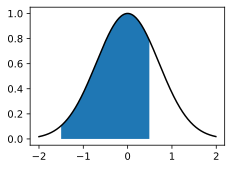

In [2]:
x = torch.arange(-2, 2, 0.01)
f = torch.exp(-x**2)

d2l.set_figsize()
d2l.plt.plot(x, f, color='black')
d2l.plt.fill_between(x.tolist()[50:250], f.tolist()[50:250])
d2l.plt.show()

We will denote this area by the integral symbol below:

$$
\mathrm{Area}(\mathcal{A}) = \int_a^b f(x) \;dx.
$$

The inner variable is a dummy variable, much like the index of a sum in a $\sum$, and so this can be equivalently written with any inner value we like:

$$
\int_a^b f(x) \;dx = \int_a^b f(z) \;dz.
$$

There is a traditional way to try and understand how we might try to approximate such integrals: we can imagine taking the region in-between $a$ and $b$ and chopping it into $N$ vertical slices.  If $N$ is large, we can approximate the area of each slice by a rectangle, and then add up the areas to get the total area under the curve.  Let's take a look at an example doing this in code.  We will see how to get the true value in a later section.


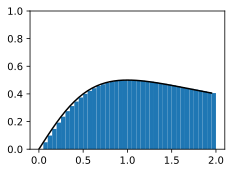

'approximation: 0.7944855690002441, truth: tensor([0.8047])'

In [3]:
epsilon = 0.05
a = 0
b = 2

x = torch.arange(a, b, epsilon)
f = x / (1 + x**2)

approx = torch.sum(epsilon*f)
true = torch.log(torch.tensor([5.])) / 2

d2l.set_figsize()
d2l.plt.bar(x, f, width=epsilon, align='edge')
d2l.plt.plot(x, f, color='black')
d2l.plt.ylim([0, 1])
d2l.plt.show()

f'approximation: {approx}, truth: {true}'

The issue is that while it can be done numerically, we can do this approach analytically for only the simplest functions like

$$
\int_a^b x \;dx.
$$

Anything somewhat more complex like our example from the code above

$$
\int_a^b \frac{x}{1+x^{2}} \;dx.
$$

is beyond what we can solve with such a direct method.

We will instead take a different approach.  We will work intuitively with the notion of the area, and learn the main computational tool used to find integrals: the *fundamental theorem of calculus*.   This will be the basis for our study of integration.

## The Fundamental Theorem of Calculus

To dive deeper into the theory of integration, let's introduce a function

$$
F(x) = \int_0^x f(y) dy.
$$

This function measures the area between $0$ and $x$ depending on how we change $x$.  Notice that this is everything we need since

$$
\int_a^b f(x) \;dx = F(b) - F(a).
$$

This is a mathematical encoding of the fact that we can measure the area out to the far end-point and then subtract off the area to the near end point as indicated in :numref:`fig_area-subtract`.

![Visualizing why we may reduce the problem of computing the area under a curve between two points to computing the area to the left of a point.](../img/sub-area.svg)
:label:`fig_area-subtract`

Thus, we can figure out what the integral over any interval is by figuring out what $F(x)$ is.

To do so, let's consider an experiment.  As we often do in calculus, let's imagine what happens when we shift the value by a tiny bit.  From the comment above, we know that

$$
F(x+\epsilon) - F(x) = \int_x^{x+\epsilon} f(y) \; dy.
$$

This tells us that the function changes by the area under a tiny sliver of a function.

This is the point at which we make an approximation.  If we look at a tiny sliver of area like this, it looks like this area is close to the rectangular area with height the value of $f(x)$ and the base width $\epsilon$.  Indeed, one can show that as $\epsilon \rightarrow 0$ this approximation becomes better and better.  Thus we can conclude:

$$
F(x+\epsilon) - F(x) \approx \epsilon f(x).
$$

However, we can now notice: this is exactly the pattern we expect if we were computing the derivative of $F$!  Thus we see the following rather surprising fact:

$$
\frac{dF}{dx}(x) = f(x).
$$

This is the *fundamental theorem of calculus*.  We may write it in expanded form as
$$\frac{d}{dx}\int_0^x  f(y) \; dy = f(x).$$
:eqlabel:`eq_ftc`

It takes the concept of finding areas (*a priori* rather hard), and reduces it to a statement derivatives (something much more completely understood).  One last comment that we must make is that this does not tell us exactly what $F(x)$ is.  Indeed $F(x) + C$ for any $C$ has the same derivative.  This is a fact-of-life in the theory of integration.  Thankfully, notice that when working with definite integrals, the constants drop out, and thus are irrelevant to the outcome.

$$
\int_a^b f(x) \; dx = (F(b) + C) - (F(a) + C) = F(b) - F(a).
$$

This may seem like abstract non-sense, but let's take a moment to appreciate that it has given us a whole new perspective on computing integrals.  Our goal is no-longer to do some sort of chop-and-sum process to try and recover the area, rather we need only find a function whose derivative is the function we have!  This is incredible since we can now list many rather difficult integrals by just reversing the table from :numref:`sec_derivative_table`.  For instance, we know that the derivative of $x^{n}$ is $nx^{n-1}$.  Thus, we can say using the fundamental theorem :eqref:`eq_ftc` that

$$
\int_0^{x} ny^{n-1} \; dy = x^n - 0^n = x^n.
$$

Similarly, we know that the derivative of $e^{x}$ is itself, so that means

$$
\int_0^{x} e^{x} \; dx = e^{x} - e^{0} = e^x - 1.
$$

In this way, we can develop the entire theory of integration leveraging ideas from differential calculus freely.  Every integration rule derives from this one fact.

## Change of Variables
:label:`subsec_integral_example`

Just as with differentiation, there are a number of rules which make the computation of integrals more tractable.  In fact, every rule of differential calculus (like the product rule, sum rule, and chain rule) has a corresponding rule for integral calculus (integration by parts, linearity of integration, and the change of variables formula respectively).  In this section, we will dive into what is arguably the most important from the list: the change of variables formula.

First, suppose that we have a function which is itself an integral:

$$
F(x) = \int_0^x f(y) \; dy.
$$

Let's suppose that we want to know how this function looks when we compose it with another to obtain $F(u(x))$.  By the chain rule, we know

$$
\frac{d}{dx}F(u(x)) = \frac{dF}{du}(u(x))\cdot \frac{du}{dx}.
$$

We can turn this into a statement about integration by using the fundamental theorem :eqref:`eq_ftc` as above.  This gives

$$
F(u(x)) - F(u(0)) = \int_0^x \frac{dF}{du}(u(y))\cdot \frac{du}{dy} \;dy.
$$

Recalling that $F$ is itself an integral gives that the left hand side may be rewritten to be

$$
\int_{u(0)}^{u(x)} f(y) \; dy = \int_0^x \frac{dF}{du}(u(y))\cdot \frac{du}{dy} \;dy.
$$

Similarly, recalling that $F$ is an integral allows us to recognize that $\frac{dF}{dx} = f$ using the fundamental theorem :eqref:`eq_ftc`, and thus we may conclude

$$\int_{u(0)}^{u(x)} f(y) \; dy = \int_0^x f(u(y))\cdot \frac{du}{dy} \;dy.$$
:eqlabel:`eq_change_var`

This is the *change of variables* formula.

For a more intuitive derivation, consider what happens when we take an integral of $f(u(x))$ between $x$ and $x+\epsilon$. For a small $\epsilon$, this integral is approximately $\epsilon f(u(x))$, the area of the associated rectangle.  Now, let's compare this with the integral of $f(y)$ from $u(x)$ to $u(x+\epsilon)$.  We know that $u(x+\epsilon) \approx u(x) + \epsilon \frac{du}{dx}(x)$, so the area of this rectangle is approximately $\epsilon \frac{du}{dx}(x)f(u(x))$.  Thus, to make the area of these two rectangles to agree, we need to multiply the first one by $\frac{du}{dx}(x)$ as is illustrated in :numref:`fig_rect-transform`.

![Visualizing the transformation of a single thin rectangle under the change of variables.](../img/rect-trans.svg)
:label:`fig_rect-transform`

This tells us that

$$
\int_x^{x+\epsilon} f(u(y))\frac{du}{dy}(y)\;dy = \int_{u(x)}^{u(x+\epsilon)} f(y) \; dy.
$$

This is the change of variables formula expressed for a single small rectangle.

If $u(x)$ and $f(x)$ are properly chosen, this can allow for the computation of incredibly complex integrals.  For instance, if we even chose $f(y) = 1$ and $u(x) = e^{-x^{2}}$ (which means $\frac{du}{dx}(x) = -2xe^{-x^{2}}$), this can show for instance that

$$
e^{-1} - 1 = \int_{e^{-0}}^{e^{-1}} 1 \; dy = -2\int_0^{1} ye^{-y^2}\;dy,
$$

and thus by rearranging that

$$
\int_0^{1} ye^{-y^2}\; dy = \frac{1-e^{-1}}{2}.
$$

## A Comment on Sign Conventions

Keen-eyed readers will observe something strange about the computations above.  Namely, computations like

$$
\int_{e^{-0}}^{e^{-1}} 1 \; dy = e^{-1} -1 < 0,
$$

can produce negative numbers.  When thinking about areas, it can be strange to see a negative value, and so it is worth digging into what the convention is.

Mathematicians take the notion of signed areas.  This manifests itself in two ways.  First, if we consider a function $f(x)$ which is sometimes less than zero, then the area will also be negative.  So for instance

$$
\int_0^{1} (-1)\;dx = -1.
$$

Similarly, integrals which progress from right to left, rather than left to right are also taken to be negative areas

$$
\int_0^{-1} 1\; dx = -1.
$$

The standard area (from left to right of a positive function) is always positive.  Anything obtained by flipping it (say flipping over the $x$-axis to get the integral of a negative number, or flipping over the $y$-axis to get an integral in the wrong order) will produce a negative area.  And indeed, flipping twice will give a pair of negative signs that cancel out to have positive area

$$
\int_0^{-1} (-1)\;dx =  1.
$$

If this discussion sounds familiar, it is!  In :numref:`sec_geometry-linear-algebraic-ops` we discussed how the determinant represented the signed area in much the same way.

## Multiple Integrals
In some cases, we will need to work in higher dimensions.  For instance, suppose that we have a function of two variables, like $f(x, y)$ and we want to know the volume under $f$ when $x$ ranges over $[a, b]$ and $y$ ranges over $[c, d]$.


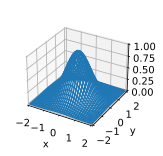

In [4]:
# Construct grid and compute function
x, y = torch.meshgrid(torch.linspace(-2, 2, 101), torch.linspace(-2, 2, 101))
z = torch.exp(- x**2 - y**2)

# Plot function
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')
d2l.plt.xticks([-2, -1, 0, 1, 2])
d2l.plt.yticks([-2, -1, 0, 1, 2])
d2l.set_figsize()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 1)
ax.dist = 12

We write this as

$$
\int_{[a, b]\times[c, d]} f(x, y)\;dx\;dy.
$$

Suppose that we wish to compute this integral.  My claim is that we can do this by iteratively computing first the integral in $x$ and then shifting to the integral in $y$, that is to say

$$
\int_{[a, b]\times[c, d]} f(x, y)\;dx\;dy = \int_c^{d} \left(\int_a^{b} f(x, y) \;dx\right) \; dy.
$$

Let's see why this is.

Consider the figure above where we have split the function into $\epsilon \times \epsilon$ squares which we will index with integer coordinates $i, j$.  In this case, our integral is approximately

$$
\sum_{i, j} \epsilon^{2} f(\epsilon i, \epsilon j).
$$

Once we discretize the problem, we may add up the values on these squares in whatever order we like, and not worry about changing the values.  This is illustrated in :numref:`fig_sum-order`.  In particular, we can say that

$$
 \sum _ {j} \epsilon \left(\sum_{i} \epsilon f(\epsilon i, \epsilon j)\right).
$$

![Illustrating how to decompose a sum over many squares as a sum over first the columns (1), then adding the column sums together (2).](../img/sum-order.svg)
:label:`fig_sum-order`

The sum on the inside is precisely the discretization of the integral

$$
G(\epsilon j) = \int _a^{b} f(x, \epsilon j) \; dx.
$$

Finally, notice that if we combine these two expressions we get

$$
\sum _ {j} \epsilon G(\epsilon j) \approx \int _ {c}^{d} G(y) \; dy = \int _ {[a, b]\times[c, d]} f(x, y)\;dx\;dy.
$$

Thus putting it all together, we have that

$$
\int _ {[a, b]\times[c, d]} f(x, y)\;dx\;dy = \int _ c^{d} \left(\int _ a^{b} f(x, y) \;dx\right) \; dy.
$$

Notice that, once discretized, all we did was rearrange the order in which we added a list of numbers.  This may make it seem like it is nothing, however this result (called *Fubini's Theorem*) is not always true!  For the type of mathematics encountered when doing machine learning (continuous functions), there is no concern, however it is possible to create examples where it fails (for example the function $f(x, y) = xy(x^2-y^2)/(x^2+y^2)^3$ over the rectangle $[0,2]\times[0,1]$).

Note that the choice to do the integral in $x$ first, and then the integral in $y$ was arbitrary.  We could have equally well chosen to do $y$ first and then $x$ to see

$$
\int _ {[a, b]\times[c, d]} f(x, y)\;dx\;dy = \int _ a^{b} \left(\int _ c^{d} f(x, y) \;dy\right) \; dx.
$$

Often times, we will condense down to vector notation, and say that for $U = [a, b]\times [c, d]$ this is

$$
\int _ U f(\mathbf{x})\;d\mathbf{x}.
$$

## Change of Variables in Multiple Integrals
As with single variables in :eqref:`eq_change_var`, the ability to change variables inside a higher dimensional integral is a key tool.  Let's summarize the result without derivation.

We need a function that reparameterizes our domain of integration.  We can take this to be $\phi : \mathbb{R}^n \rightarrow \mathbb{R}^n$, that is any function which takes in $n$ real variables and returns another $n$.  To keep the expressions clean, we will assume that $\phi$ is *injective* which is to say it never folds over itself ($\phi(\mathbf{x}) = \phi(\mathbf{y}) \implies \mathbf{x} = \mathbf{y}$).

In this case, we can say that

$$
\int _ {\phi(U)} f(\mathbf{x})\;d\mathbf{x} = \int _ {U} f(\phi(\mathbf{x})) \left|\det(D\phi(\mathbf{x}))\right|\;d\mathbf{x}.
$$

where $D\phi$ is the *Jacobian* of $\phi$, which is the matrix of partial derivatives of $\boldsymbol{\phi} = (\phi_1(x_1, \ldots, x_n), \ldots, \phi_n(x_1, \ldots, x_n))$,

$$
D\boldsymbol{\phi} = \begin{bmatrix}
\frac{\partial \phi _ 1}{\partial x _ 1} & \cdots & \frac{\partial \phi _ 1}{\partial x _ n} \\
\vdots & \ddots & \vdots \\
\frac{\partial \phi _ n}{\partial x _ 1} & \cdots & \frac{\partial \phi _ n}{\partial x _ n}
\end{bmatrix}.
$$

Looking closely, we see that this is similar to the single variable chain rule :eqref:`eq_change_var`, except we have replaced the term $\frac{du}{dx}(x)$ with $\left|\det(D\phi(\mathbf{x}))\right|$.  Let's see how we can to interpret this term.  Recall that the $\frac{du}{dx}(x)$ term existed to say how much we stretched our $x$-axis by applying $u$.  The same process in higher dimensions is to determine how much we stretch the area (or volume, or hyper-volume) of a little square (or little *hyper-cube*) by applying $\boldsymbol{\phi}$.  If $\boldsymbol{\phi}$ was the multiplication by a matrix, then we know how the determinant already gives the answer.

With some work, one can show that the *Jacobian* provides the best approximation to a multivariable function $\boldsymbol{\phi}$ at a point by a matrix in the same way we could approximate by lines or planes with derivatives and gradients. Thus the determinant of the Jacobian exactly mirrors the scaling factor we identified in one dimension.

It takes some work to fill in the details to this, so do not worry if they are not clear now.  Let's see at least one example we will make use of later on.  Consider the integral

$$
\int _ {-\infty}^{\infty} \int _ {-\infty}^{\infty} e^{-x^{2}-y^{2}} \;dx\;dy.
$$

Playing with this integral directly will get us no-where, but if we change variables, we can make significant progress.  If we let $\boldsymbol{\phi}(r, \theta) = (r \cos(\theta),  r\sin(\theta))$ (which is to say that $x = r \cos(\theta)$, $y = r \sin(\theta)$), then we can apply the change of variable formula to see that this is the same thing as

$$
\int _ 0^\infty \int_0 ^ {2\pi} e^{-r^{2}} \left|\det(D\mathbf{\phi}(\mathbf{x}))\right|\;d\theta\;dr,
$$

where

$$
\left|\det(D\mathbf{\phi}(\mathbf{x}))\right| = \left|\det\begin{bmatrix}
\cos(\theta) & -r\sin(\theta) \\
\sin(\theta) & r\cos(\theta)
\end{bmatrix}\right| = r(\cos^{2}(\theta) + \sin^{2}(\theta)) = r.
$$

Thus, the integral is

$$
\int _ 0^\infty \int _ 0 ^ {2\pi} re^{-r^{2}} \;d\theta\;dr = 2\pi\int _ 0^\infty re^{-r^{2}} \;dr = \pi,
$$

where the final equality follows by the same computation that we used in section :numref:`subsec_integral_example`.

We will meet this integral again when we study continuous random variables in :numref:`sec_random_variables`.

## Summary

* The theory of integration allows us to answer questions about areas or volumes.
* The fundamental theorem of calculus allows us to leverage knowledge about derivatives to compute areas via the observation that the derivative of the area up to some point is given by the value of the function being integrated.
* Integrals in higher dimensions can be computed by iterating single variable integrals.

## Exercises
1. What is $\int_1^2 \frac{1}{x} \;dx$?
2. Use the change of variables formula to integrate $\int_0^{\sqrt{\pi}}x\sin(x^2)\;dx$.
3. What is $\int_{[0,1]^2} xy \;dx\;dy$?
4. Use the change of variables formula to compute $\int_0^2\int_0^1xy(x^2-y^2)/(x^2+y^2)^3\;dy\;dx$ and $\int_0^1\int_0^2f(x, y) = xy(x^2-y^2)/(x^2+y^2)^3\;dx\;dy$ to see they are different.


[Discussions](https://discuss.d2l.ai/t/1092)
